In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data', delimiter=',', header =None, encoding ='latin8')
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.columns = ['id_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion',
             'single_epithetial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df.head()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithetial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.shape

(699, 11)

In [9]:
#check for null values
df.isnull().values.any()

False

In [10]:
# Print the datatypes in our dataframe
df.dtypes

id_number                       int64
clump_thickness                 int64
uniformity_cell_size            int64
uniformity_cell_shape           int64
marginal_adhesion               int64
single_epithetial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

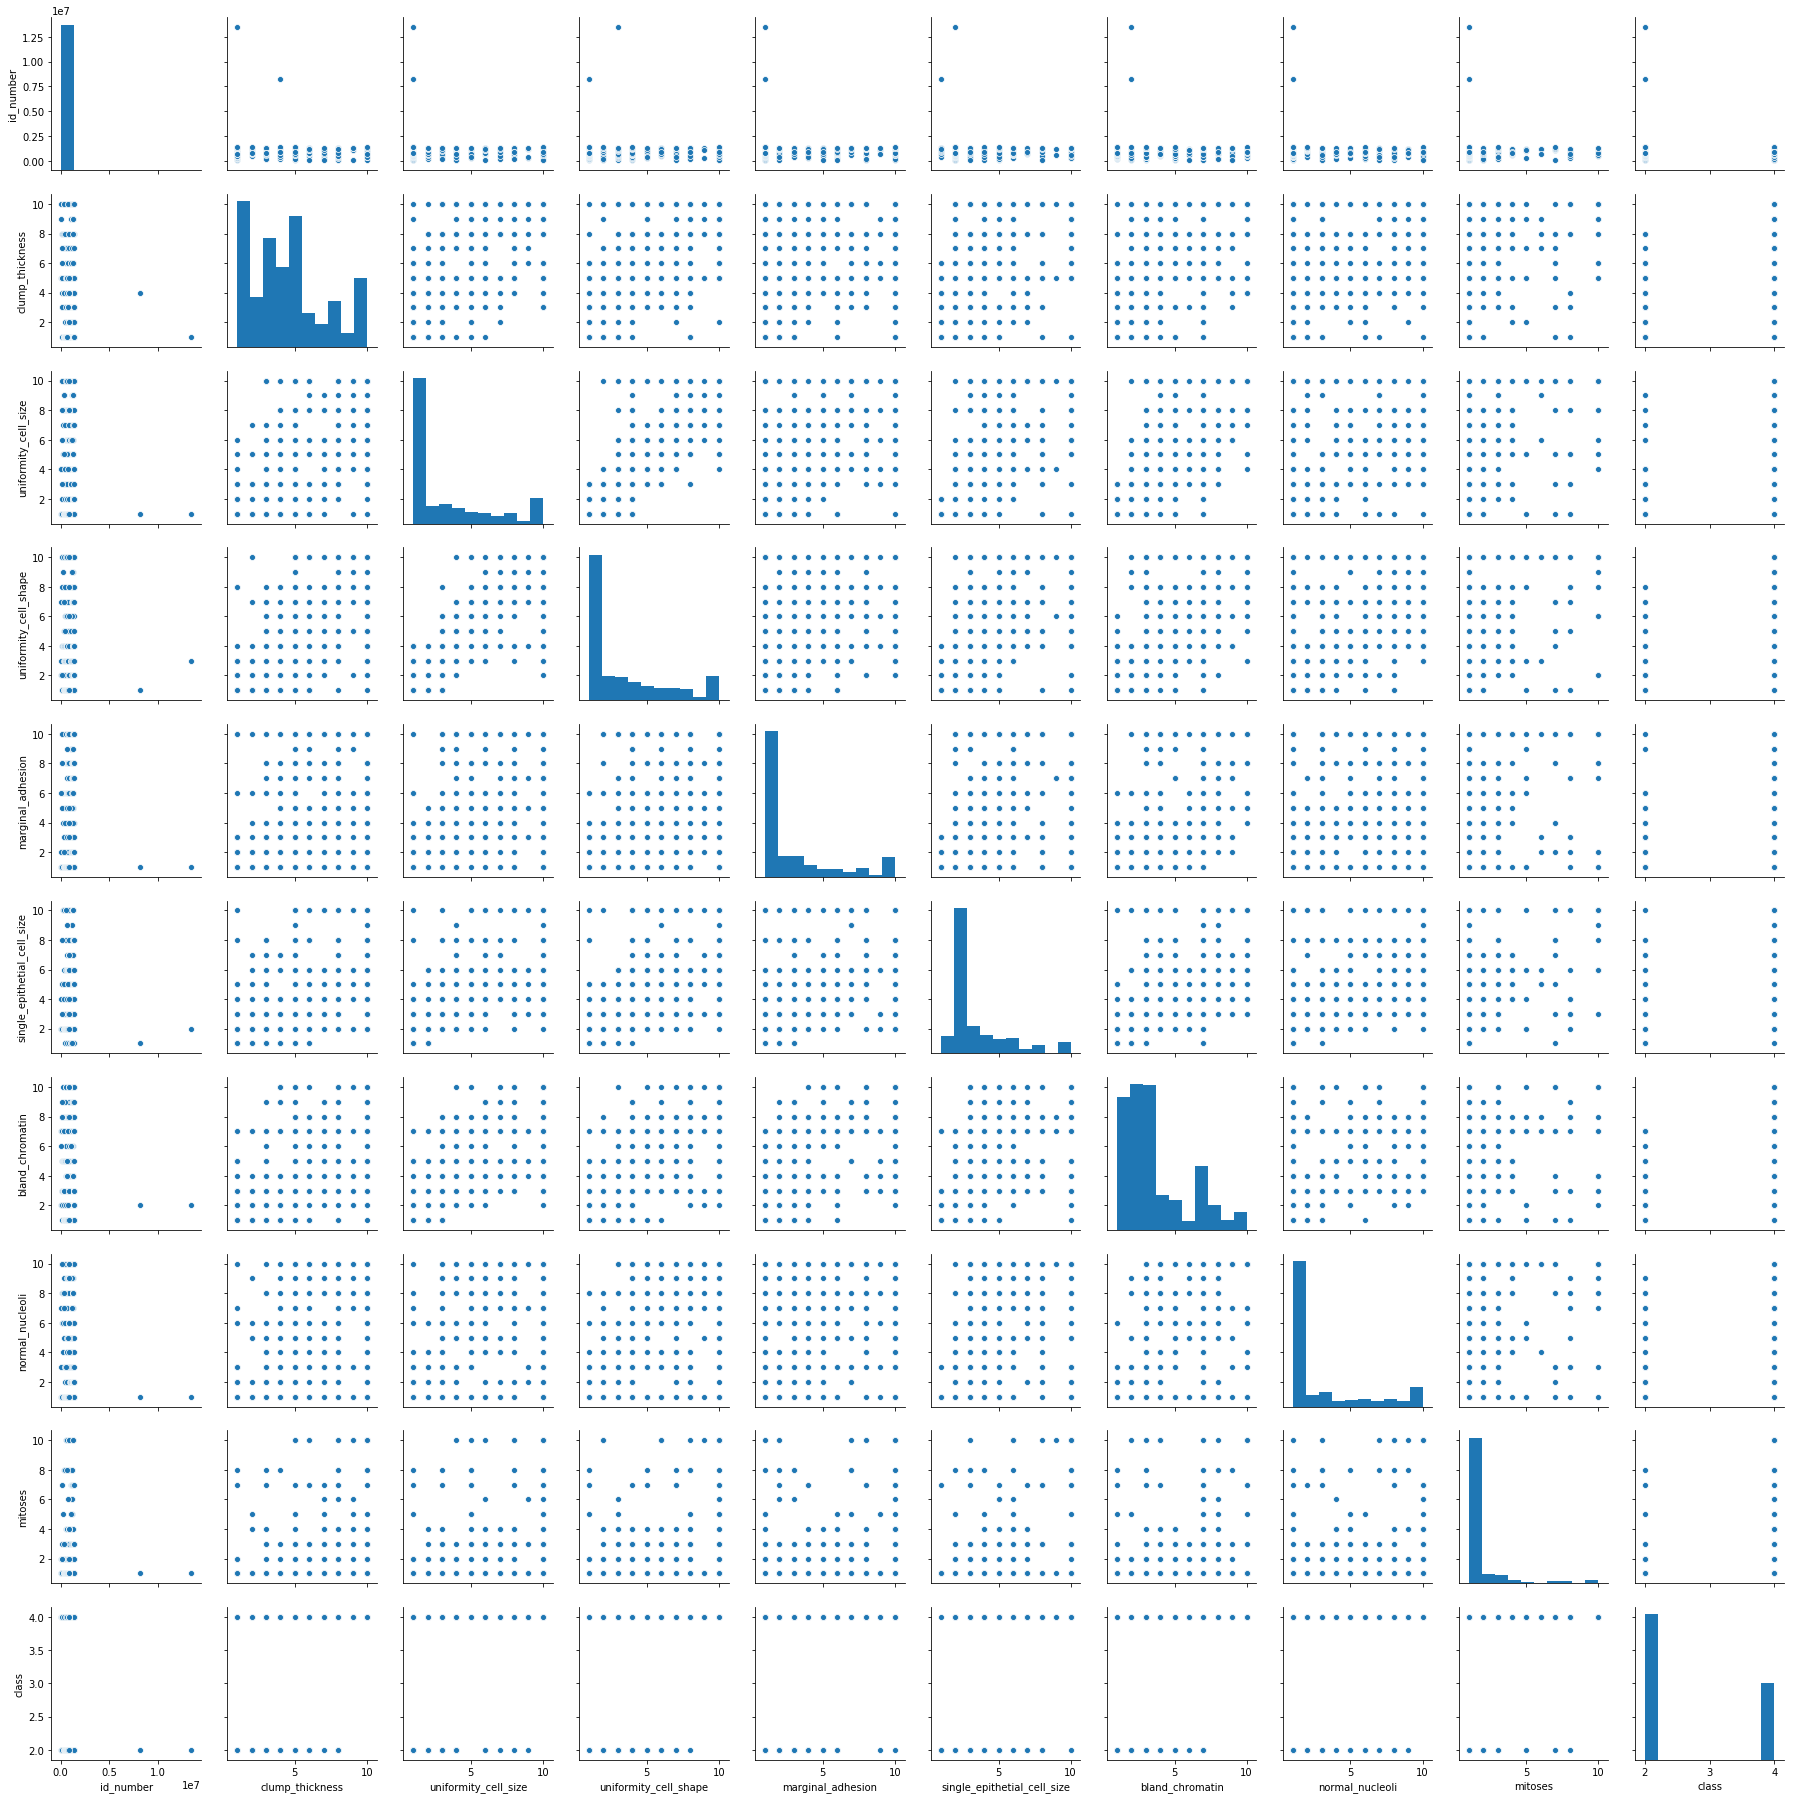

In [11]:
sns.pairplot(df)

In [16]:
# Remove non-numeric entries from bare_nuclei
df = df[df.bare_nuclei.apply(lambda x: x.isnumeric())]
df['bare_nuclei'] = df['bare_nuclei'].astype(np.int64)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df.dtypes

id_number                      int64
clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithetial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [22]:
# Remove id and class from the dataframe
X = df.drop('id_number', axis=1)
X = X.drop('class', axis=1)
y = np.where(df['class']== 4, 1, 0)

Text(0.5, 1.0, 'Distribution of predictor variables')

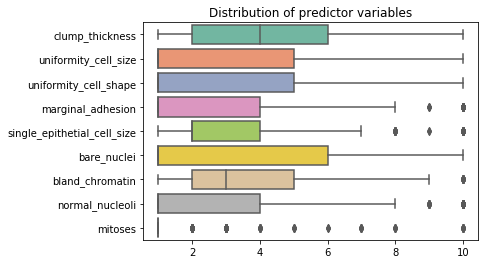

In [23]:
# Create boxplot for all numeric variables
sns.boxplot(data = X, orient ='h', palette = 'Set2')
plt.title('Distribution of predictor variables')

Text(0.5, 1.0, 'Variable Correlation')

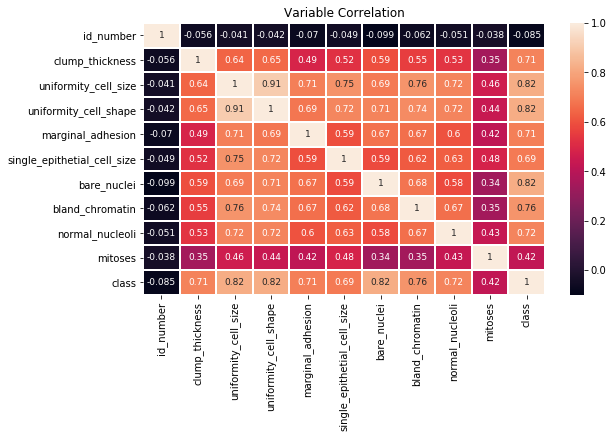

In [26]:
#check for collinearity
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [27]:
#drop variable that shows collinearity
X = X.drop('uniformity_cell_shape', axis=1)

(-1.1156682582755633,
 1.1129564944589363,
 -1.1143106757747783,
 1.1172903345825824)

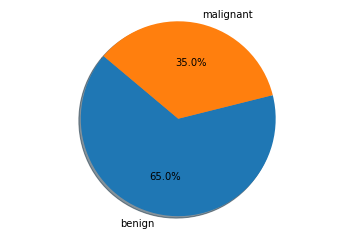

In [28]:
# show malignant vs. non malignant
plt.pie(np.bincount(y), labels=['benign', 'malignant'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

In [30]:
#start building model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

model = clf.fit(X_train, y_train.ravel())
score = cross_val_score(model, X_train, y_train.ravel(), cv=10)
print ('Mean cross validation score for train is: ' + str(np.mean(score)))

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.03414634146341464
Percent Type II errors: 0.02926829268292683
Mean cross validation score for train is: 0.9686523013460704


In [41]:
import xgboost
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

ModuleNotFoundError: No module named 'xgboost'